### Question 3: Object Detection

In [443]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [444]:
cell_size = (4, 4)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins
# definning function to compute the hog features
def my_HOG(cars):
    h = []
    cells= []
    for i in range(0, len(cars)):
        hog = cv2.HOGDescriptor(_winSize = (cars[i].shape[1]//cell_size[1]*cell_size[1], 
                                            cars[i].shape[0]//cell_size[0]*cell_size[0]),
                                _blockSize = (block_size[1]*cell_size[1], 
                                              block_size[0]*cell_size[0]),
                                _blockStride = (cell_size[1], cell_size[0]),
                                _cellSize = (cell_size[1], cell_size[0]),
                                _nbins = nbins)
        
        n_cells = (cars[i].shape[0]//cell_size[0], cars[i].shape[1]//cell_size[1])
        cells.append(n_cells)
        
        h.append(hog.compute(cars[i]) \
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[1], block_size[0], nbins) \
               .transpose((1, 0, 3, 2, 4)))
    return h

In [445]:
# Making function for Sliding Window

def sliding_window(image,stride_size,win_size):
    for y in range(0,image.shape[0],stride_size):
        for x in range(0,image.shape[1],stride_size):
            yield (x, y, image[y:y + win_size[1], x:x + win_size[0]])

In [446]:
# Import of the Images, resizing them to 128x128, also creationg of new list with flipped images
cars = []
cars_flipped = []
for i in range(1,15):
    cars.append(cv2.imread('car{}.jpg'.format(i),cv2.COLOR_BGR2GRAY))
    cars[i-1] = cv2.resize(cars[i-1],(128,128),interpolation = cv2.INTER_AREA)
    cars_flipped.append(cv2.flip(cars[i-1],0))

In [447]:
# Computing HOG descriptors for both un flipped and flipped images
h = my_HOG(cars)
h_flipped = my_HOG(cars_flipped)
mean_features_cars = np.sum(h,0)/14
mean_features_cars_flipped = np.sum(h_flipped,0)/14

#### Histograms for Non-flipped images

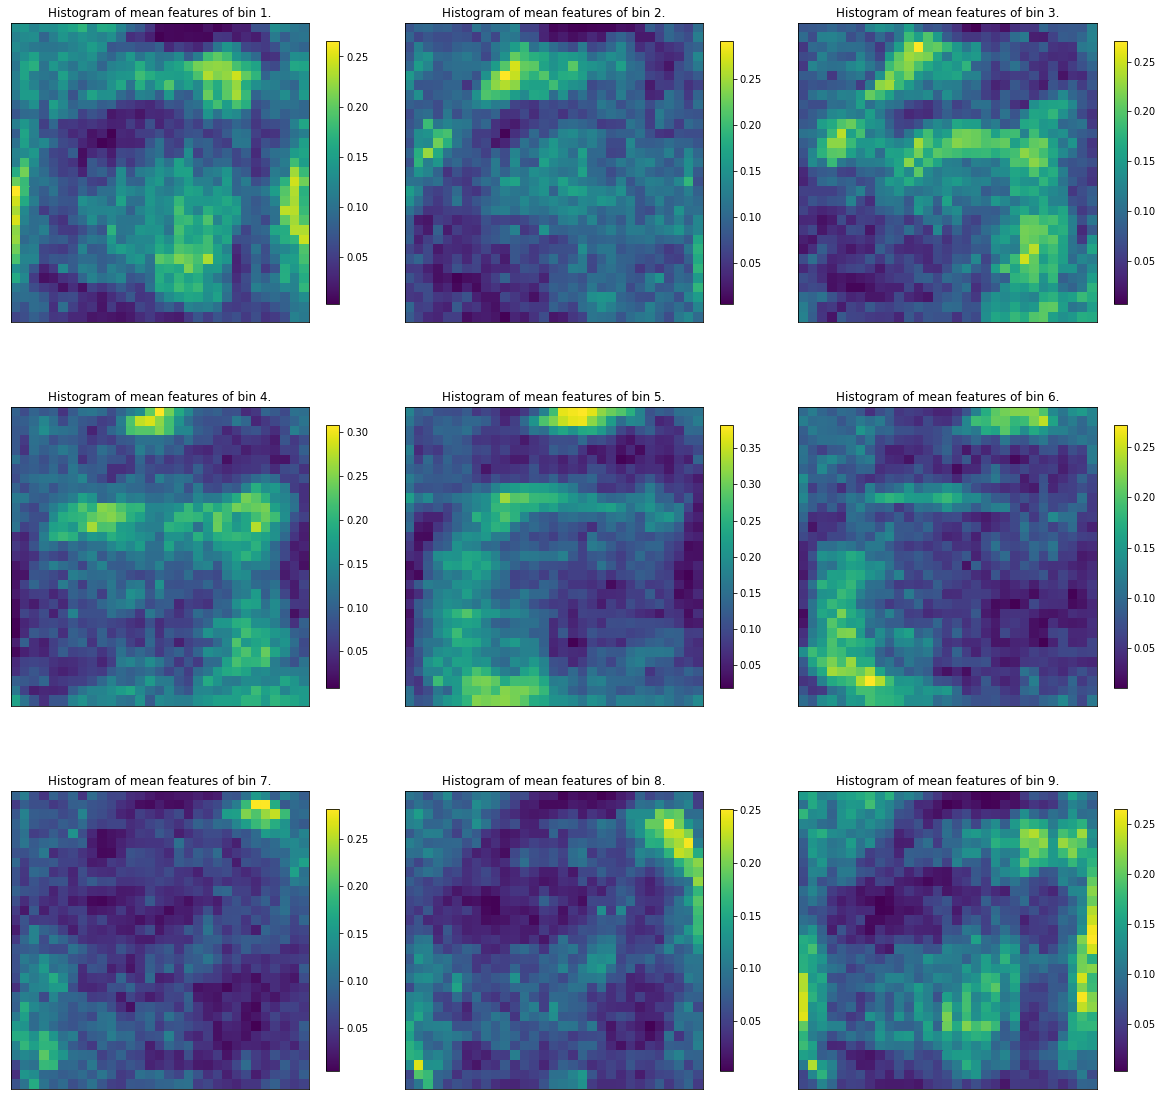

In [448]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1), plt.pcolor(mean_features_cars[:, :, 0,0,i])
    plt.title('Histogram of mean features of bin {}.'.format(i+1))
    plt.gca().invert_yaxis(), plt.xticks([]),plt.yticks([])
    plt.gca().set_aspect('equal', adjustable = 'box')
    plt.colorbar(fraction=0.04)
plt.show()

#### Histograms for Flipped images

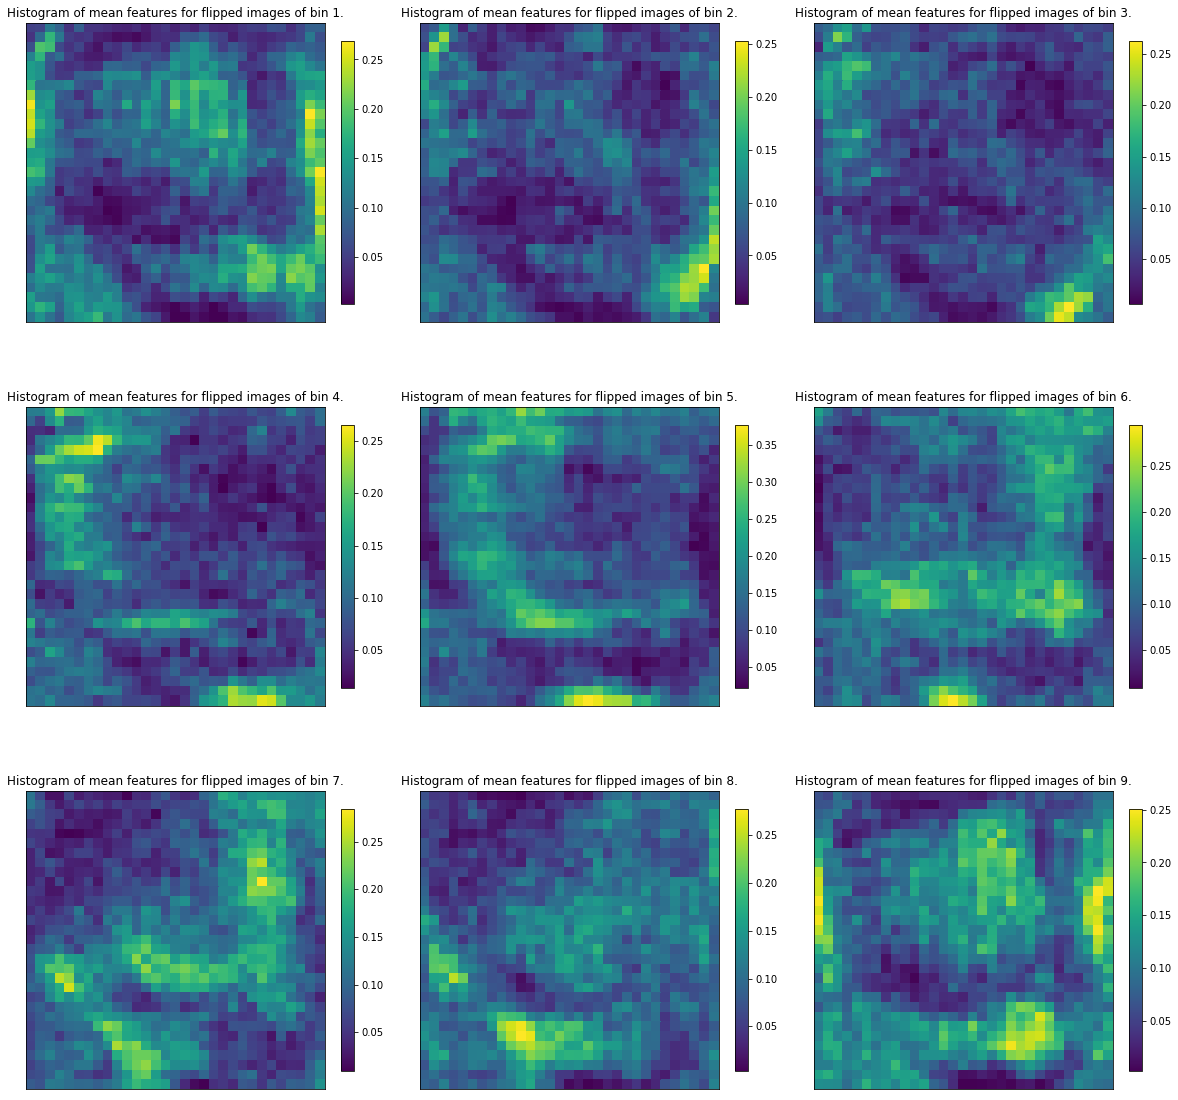

In [449]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1), plt.pcolor(mean_features_cars_flipped[:, :, 0,0,i])
    plt.title('Histogram of mean features for flipped images of bin {}.'.format(i+1))
    plt.gca().invert_yaxis(), plt.xticks([]),plt.yticks([])
    plt.gca().set_aspect('equal', adjustable = 'box')
    plt.colorbar(fraction=0.04)
plt.show()

In [450]:
test = cv2.imread('test.jpg',cv2.COLOR_BGR2GRAY)
(winW, winH) = (128, 128)
h2 = []

In [451]:
win = []
for (x,y,window) in sliding_window(test,70,win_size=(winW,winH)):
    if window.shape[0] != winH or window.shape[1] != winW:
        continue
    win.append(window)

In [452]:
d_n = []
d_n_flipped = []
h2 = my_HOG(win)

In [453]:
for i in range(len(h2)):
    d_n.append(cv2.norm(mean_features_cars,h2[i]))
    d_n_flipped.append(cv2.norm(mean_features_cars_flipped,h2[i]))

In [454]:
# Creating thresholding for the images
md = np.mean(d_n)
mdf = np.mean(d_n_flipped)
ms = md - np.std(d_n)*0.75
mx = mdf - np.std(d_n_flipped)*0.75
print(md,mdf)
print(ms,mx)

23.877797548744358 23.893912606576706
22.886997766035634 22.91066198878105


In [455]:
d_n6 = []
d_n5 = np.logical_and(d_n < ms,d_n < mx)
for i in range(len(d_n)):
    if d_n[i] < ms and d_n[i] < mx:
        d_n6.append(d_n[i])

In [457]:
l1 = []
l3 = []
for j in range(len(d_n6)):
    l1.append([i for i,x in enumerate(d_n) if x == d_n6[j]])

In [459]:
dx3 = [win[10],win[19],win[20],win[22],win[23],win[26],win[27]]

In [460]:
d_n2 = sorted(d_n)
d_n3 = np.argsort(d_n)
d_n4 = d_n3[:10]
dx = [win[i] for i in d_n4]
for i in range(len(dx)):
    dx[i] = cv2.cvtColor(dx[i], cv2.COLOR_BGR2RGB)
for i in range(len(dx3)):
    dx3[i] = cv2.cvtColor(dx3[i], cv2.COLOR_BGR2RGB)

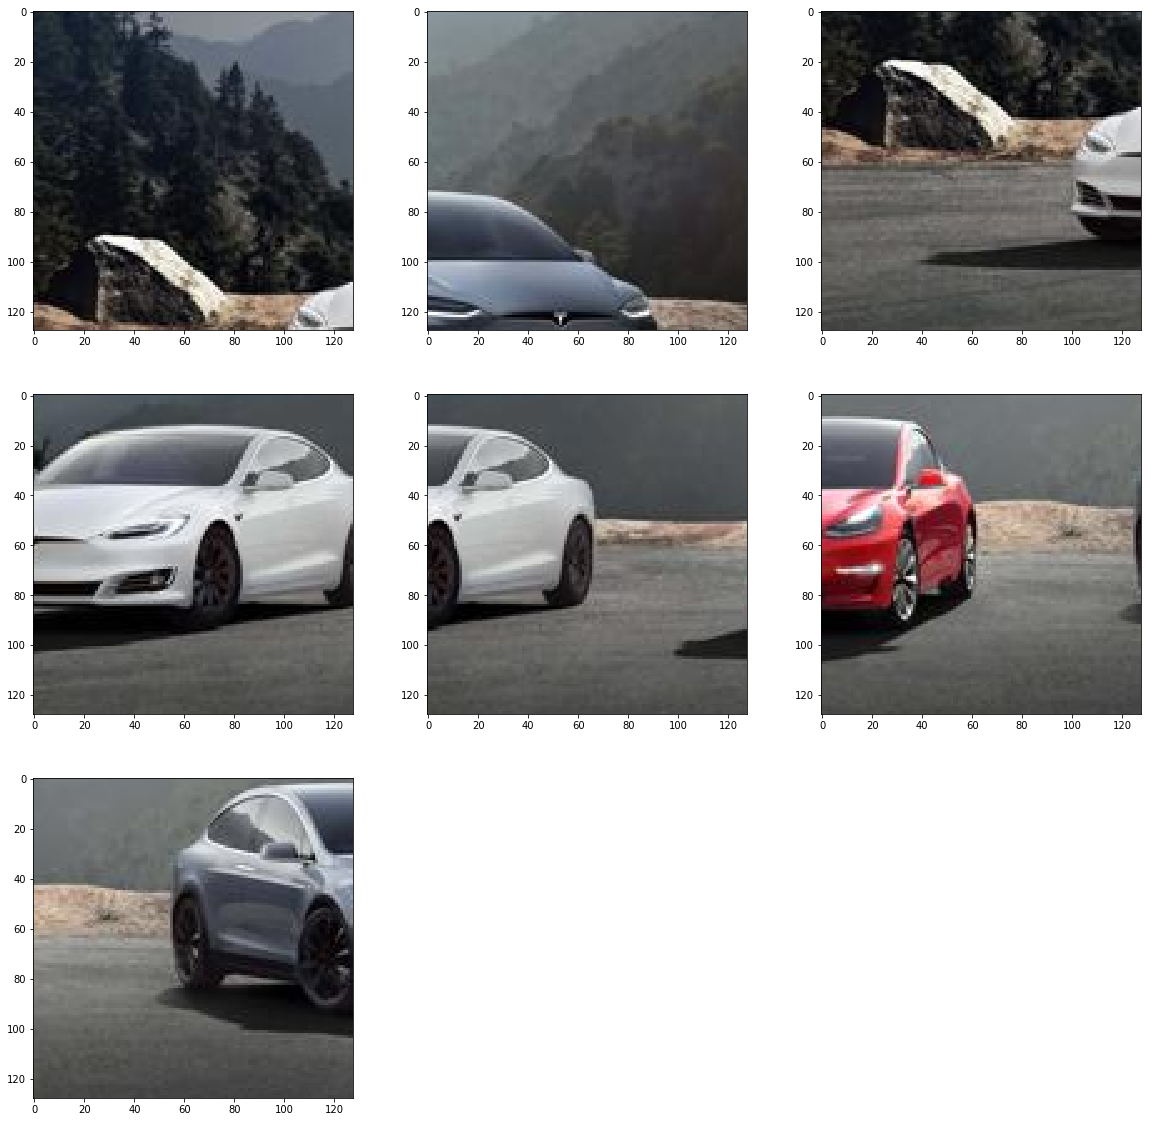

In [461]:
plt.figure(figsize=(20,20))
for i in range(7):
    plt.subplot(3,3,i+1),plt.imshow(dx3[i])
plt.show()

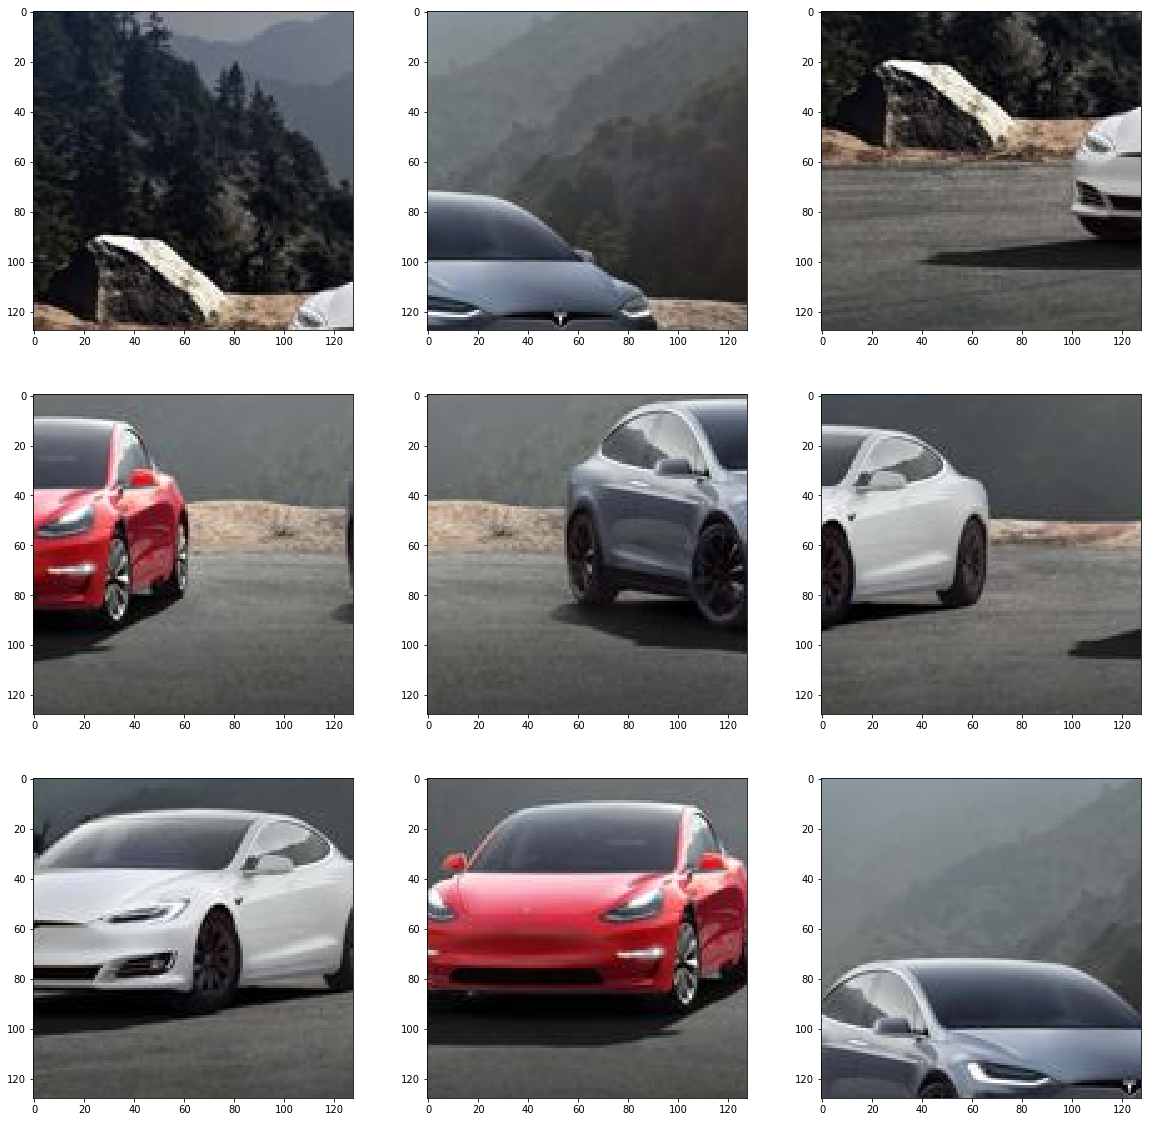

In [462]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1),plt.imshow(dx[i])
plt.show()

Received relatevely good detections with a stride of 70 and getting values lower than the threshold. 
Received better results by sorting the distance into the top 10 and using those windows